<a id="back"></a>
### Содержание 

- #### [0. Постановка задач.](#step_0)
- #### [1. Изучение данных из файлов.](#step_1)
- #### [2. Подготовка / предобработка данных.](#step_2)
- #### [3. Исследовательский анализ данных.](#step_3)
- #### [4. Портрет пользователя каждого региона.](#step_4)
- #### [5. Проверка гипотез.](#step_5)
- #### [6. Общий вывод.](#step_6)

<a id="step_0"></a>
## 0= Постановка задач

Роль в проекте - аналитик в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id="step_1"></a>
## 1= Изучение данных из файла

[к оглавлению](#back)

### Импорт библиотек.


In [1]:
import pandas as pd
import os
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Настройка формата чисел и т.п.

In [2]:
pd.options.display.float_format = '{:.2f}'.format


### Импорт данных и общая информация.

|имя файла              |id |link |
|-----------------------|---|-----|
|/datasets/calls.csv    |1APX832xz8Z1Ptf3ptdNq0k9X3pGCh[...]|https://drive.google.com/file/d/1APX832xz8Z1Ptf3ptdNq0k9X3pGCh[...]/view?usp=sharing|

Датасет для колаба сохранён здесь: https://colab.research.google.com/drive/1ADKk81PRYoS70re5tmrx4czNJYDcF[...]?usp=sharing

In [3]:
print('Загружаем датасеты из google drive, если возможно:')

try:
    ! gdown 1APX832xz8Z1Ptf3ptdNq0k9X3pGCh[...]
    #print('Датасеты загружены из Google Drive')
except:
    print('Датасеты из Google Drive загрузить НЕ удалось!')

Загружаем датасеты из google drive, если возможно:
/bin/bash: gdown: command not found


**Определяем переменные датасетов:**

Префиксы:

In [4]:
path_prefix_yandex = '/datasets/'
path_prefix_local = '../datasets/'
path_prefix_colab = '/content/'

games_name = 'games.csv'

games_y = path_prefix_yandex + games_name
games_l = path_prefix_local + games_name
games_c = path_prefix_colab + games_name

if os.path.exists(games_y):
    df    = pd.read_csv(games_y)
    print('Загружены данные с сервера Яндекс.Практикума.')
elif os.path.exists(games_l):
    df    = pd.read_csv(games_l)
    print('Загружены данные с локального сервера.')
elif os.path.exists(games_c):
    df    = pd.read_csv(games_c)
    print('Загружены данные с сервера Google Colab.')
else:
    print('Что-то пошло не так... Проверь названия и пути испортируемых файлов.')

Загружены данные с сервера Яндекс.Практикума.


#### Вывод по разделу "Изучение данных из файла"

Данные загружены, можно приступать к предобработке.

<a id="step_2"></a>
## 2 = Предобработка данных

[к оглавлению](#back)

**Задачи:**
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:

* *** Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* *** Опишите причины, которые могли привести к пропускам;
* *** Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Смотрим общую информацию:

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Выводы:**

*Названия столбцов:*
* их обозначение не соотвествует общепринятому `snake style`. Чтобы соотвествовало - необходимо названия всех столбцов привести к нижнему регистру

*пропуски*
* `Year_of_Release`, `Name`, `Critic_Score`, `User_Score`, `Rating ` - не хватает части данных.

*не тот тип данных*
* `Year_of_Release` - типа float ⇒ нужно заменить на data.
* `*_Score` - скорее всего необходимо привести к типу `int`.


#### Приводим названия столбцов к нижнему регистру:

In [7]:
df.columns.values

array(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales',
       'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score',
       'User_Score', 'Rating'], dtype=object)

In [8]:
def cols_to_lower(df):
    for col in df.columns.values:
        df.rename(columns = {col : col.lower()}, inplace=True)
        #print(df[col.lower()])
    return 'Поля приведены к нижнему регистру'

In [9]:
cols_to_lower(df)

'Поля приведены к нижнему регистру'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменяем тип данных:



##### Поле `year_of_release`:

In [11]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Поле `critic_score`:

In [14]:
df['critic_score'].value_counts()

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
29.00      3
13.00      1
22.00      1
17.00      1
21.00      1
Name: critic_score, Length: 82, dtype: int64

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Итак, убедились, что здесь одни целые числа, и значит, что можно заменить на int.

Но предварительно нужно убрать nan, чтобы можно было сделать преобразование типов.

Посчитаем, сколько значений nan:

In [16]:
df['critic_score'].isna().sum() / df['platform'].count()

0.5131917439425665

**Вывод**: около половины данных в поле не заполнено. Отбросить мы их не можем, заполнить - тоже было бы внесением существенных искажений в датасет.

Поэтому тип на float менять не будем - изменение типов этого не стоит.

##### Поле `user_score`:



In [17]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.9       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
df['user_score'].isna().sum() / df['platform'].count()

0.4008973975471134

In [20]:
df[df['user_score'] == 'tbd']['platform'].count() / df['platform'].count()

0.1450194436135208

**Вывод:**

Заполнять NaN тут также не имеет смысла, т.к. таких значений тут много - 40%.

Также видно, что делать из этого поля int не стоит, т.к. тут максмальная оценка = 10, и каждая оценка имеет значимую цифру после запятой. 

Ещё один вывод - тут есть значение `tbd`, которое при всём желании невозможно привести к численному формату. Отбросить `tbd` мы также не можем, потому что этих значений у нас много - `14%`

#### Обрабатываем пропуски.

In [21]:
display(
    pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %'])
    .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


##### Поле `name`.

In [22]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры, про которые практически ничего не известно. Их доля в общей выборке:

In [23]:
df[df['name'].isna()]['platform'].count() / df['platform'].count()

0.00011965300628178283

... около 0.12%. Можно смело отбросить.

In [24]:
df = df[~df['name'].isna()]

In [25]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


Ok, пустых значений не осталось.

<a id="note1"></a>
##### Поле `year_of_release`.

In [27]:
df[df['year_of_release'].isna()]['platform'].count()

269

In [28]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaT,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaT,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaT,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaT,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Видно, что строчки не пустые, в них есть информация. Посчитаем их долю, чтобы можно было понять, можно ли их отбросить. 

In [29]:
df[df['year_of_release'].isna()]['platform'].count() / df['platform'].count()

0.016095255190570215

1.6% - это немного, можно удалить строчки, сильно повлиять на статистику они не должны. 

Можно заполнить. 
* Автоматом (например, медианой) заполнить не получится, т.к. полезного в статистику это не добавит.
* Вручную - прогуглить каждую игру и посмотреть, когда она была выпущена. Но делать это 269 раз руками не хочется

Но можно и не удалять, и не знаполнять. Статистику это не должно исказить. Так и сделаю.

##### Поле `genre`.

In [30]:
df[df['genre'].isna()]['platform'].count()

0

В поле жанр пропусков нет. Хорошо. 

##### Поле `critic_score`.

In [31]:
df[df['critic_score'].isna()]['platform'].count()

8576

In [32]:
df[df['critic_score'].isna()]['platform'].count() / df['platform'].count()

0.5131334889008556

В этом поле более 50% пропусков.

Удалять такое большое количество нельзя. 
Это поле - это субъективная оценка. Поэтому заменить на медианное значение - тоже нельзя.

Поэтому оставим это поле "как есть".

##### Поле `user_score`.

In [33]:
df[df['user_score'].isna()]['platform'].count()

6699

In [34]:
df[df['user_score'].isna()]['platform'].count() / df['platform'].count()

0.400825704541375

##### Поле `rating`.

In [35]:
df[df['rating'].isna()]['platform'].count()

6764

In [36]:
df[df['rating'].isna()]['platform'].count() / df['platform'].count()

0.40471489259857596

В этом поле более 40% пропусков.

пропуск можно трактовать как "рейтинг (ещё) не присвоен". Но можно обнаружить, что в рейнинговой шкале есть значение «RP» («Rating Pending»). 

С другой стороны, этот рейтинг актуален только для североамериканского континента. Поэтому корректнее обозвать эти пропуски не RP, а NotSet 

In [37]:
df.loc[df['rating'].isna(), 'rating'] = 'NotSet'
df[df['rating'].isna()]['platform'].count() / df['platform'].count()

0.0

In [38]:
df['rating'].value_counts()

NotSet    6764
E         3990
T         2961
M         1563
E10+      1420
EC           8
RP           3
K-A          3
AO           1
Name: rating, dtype: int64

#### Обрабатываем аномалии для каждого столбца.

Перечислим сами столбцы:

In [39]:
df.columns.values

array(['name', 'platform', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'], dtype=object)

##### Поле `name`

In [40]:
df['name'].value_counts()

Need for Speed: Most Wanted             12
FIFA 14                                  9
Madden NFL 07                            9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
                                        ..
Animal Genius                            1
Hakuouki: Yuugi Roku DS                  1
Donkey Kong Country: Tropical Freeze     1
Arcade Hits: Frisky Tom                  1
Pursuit Force: Extreme Justice           1
Name: name, Length: 11559, dtype: int64

Вот это удивительно. Некоторые игры встречаются аж по 12 раз. Это повод проверить на дубликаты.

In [41]:
df.duplicated().value_counts()

False    16713
dtype: int64

Странно, полных дублей нет. Посмотрим какую-нибудь игру, которая часто повторяется:

In [42]:
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005-01-01,Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,2012-01-01,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NotSet
1190,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,2005-01-01,Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012-01-01,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NotSet
3581,Need for Speed: Most Wanted,GC,2005-01-01,Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013-01-01,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NotSet
6410,Need for Speed: Most Wanted,DS,2005-01-01,Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


То есть получается, что одноимённая игра выходила на разных платформах, а также в 2005 и 2012 году. Значит, это не дубли. Ок, идём дальше. 

##### Поле `platform`

In [43]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Ничего необычного. Идём дальше. 

##### Поле `year_of_release`

In [44]:
df['year_of_release'].value_counts().sort_values()

1980-01-01       9
1985-01-01      14
1984-01-01      14
1988-01-01      15
1987-01-01      16
1990-01-01      16
1989-01-01      17
1983-01-01      17
1986-01-01      21
1982-01-01      36
1991-01-01      41
1992-01-01      43
1981-01-01      46
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1999-01-01     338
2000-01-01     350
1998-01-01     379
2001-01-01     482
2016-01-01     502
2013-01-01     544
2014-01-01     581
2015-01-01     606
2012-01-01     653
2004-01-01     762
2003-01-01     775
2002-01-01     829
2005-01-01     939
2006-01-01    1006
2011-01-01    1136
2007-01-01    1197
2010-01-01    1255
2009-01-01    1426
2008-01-01    1427
Name: year_of_release, dtype: int64

Ничего необычного. Идём дальше. 

##### Поле `genre`

In [45]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

##### Поле `na_sales`

<AxesSubplot:>

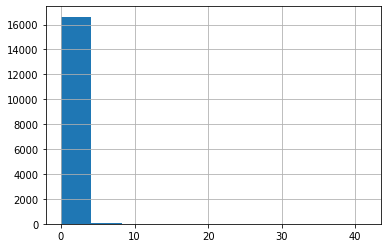

In [46]:
df['na_sales'].hist()

Ага, похоже, есть выбросы. Проверим.

In [47]:
df['na_sales'].describe()

count   16713.00
mean        0.26
std         0.81
min         0.00
25%         0.00
50%         0.08
75%         0.24
max        41.36
Name: na_sales, dtype: float64

Проверим, какие игры имели продажи более 10 млн копий.

In [48]:
df.query('na_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NotSet
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NotSet
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NotSet
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NotSet


Так, похоже, что это не выбросы - это действительно хиты! Поэтому отбрасывать их нельзя.

##### Поле `eu_sales`

<AxesSubplot:>

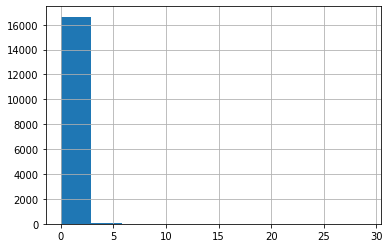

In [49]:
df['eu_sales'].hist()

Аналогично предыдущему полю - это не выбросы - это действительно хиты! Поэтому отбрасывать их нельзя.

##### Поле `jp_sales`

<AxesSubplot:>

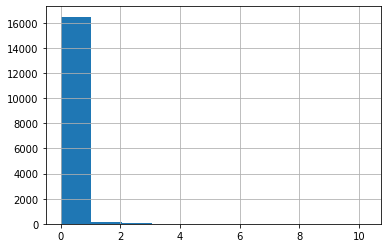

In [50]:
df['jp_sales'].hist()

Аналогично предыдущему полю - это не выбросы - это действительно хиты! Поэтому отбрасывать их нельзя.

##### Поле `other_sales`

<AxesSubplot:>

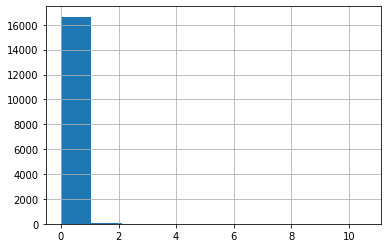

In [51]:
df['other_sales'].hist()

Аналогично предыдущему полю - это не выбросы - это действительно хиты! Поэтому отбрасывать их нельзя.

##### Поле `world_sales`

После анализа полей по продажам по отдельным регионам, было бы логично сделать сводный столбец с суммой продаж по всем регионам

<AxesSubplot:>

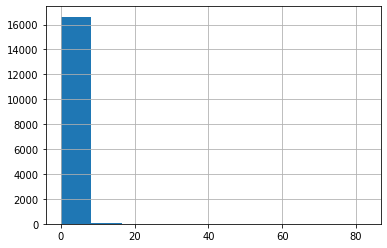

In [52]:
df['world_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']
df['world_sales'].describe()
df['world_sales'].hist()

<AxesSubplot:>

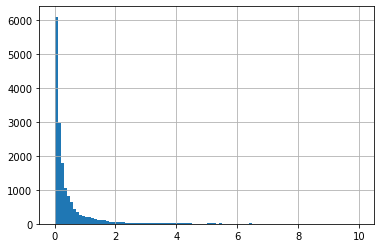

In [53]:
df['world_sales'].hist(
    bins = 100, 
    range = (0,10)
    )

<AxesSubplot:>

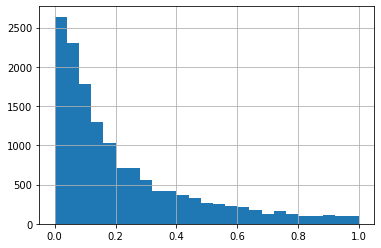

In [54]:
df['world_sales'].hist(
    bins = 25, 
    range = (0,1)
    )

<AxesSubplot:>

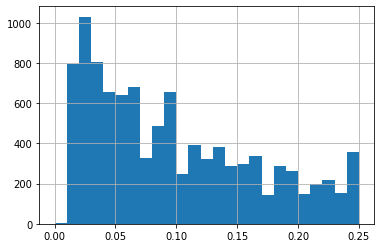

In [55]:
df['world_sales'].hist(
    bins = 25, 
    range = (0,0.25)
    )

In [56]:
df['world_sales'].median()

0.16999999999999998

In [57]:
df[df['world_sales'] < 0.010]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16676,G1 Jockey 4 2008,PS3,2008-01-01,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NotSet,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NotSet,0.00


Картина примерно повторяет ситуацию по регионам - есть отдельные хиты, а большинство игр имеют медиану в районе 170 тыс копий.

При этом есть отдельные игры, которые вообще не продаются

Также из анализа данных понятно, что для платформы DS есть выбросы - какие-то продажи есть аж в 1984 году, хотя основные продажи начались в 2004 году. Проверим:

In [58]:
df.query('platform == "DS" and year_of_release < 1990')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15957,Strongest Tokyo University Shogi DS,DS,1985-01-01,Action,0.00,0.00,0.02,0.00,NaN,NaN,NotSet,0.02


Игра не самая популярная. Можно её удалить из датафрейма.

In [59]:
df = df[df['name'] != 'Strongest Tokyo University Shogi DS']


##### Поле `critic_score`

<AxesSubplot:>

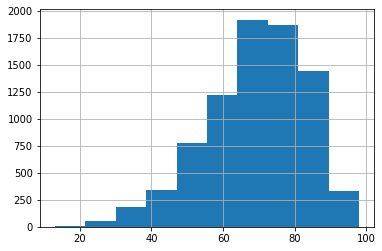

In [60]:
df['critic_score'].hist()

##### Поле `user_score`

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

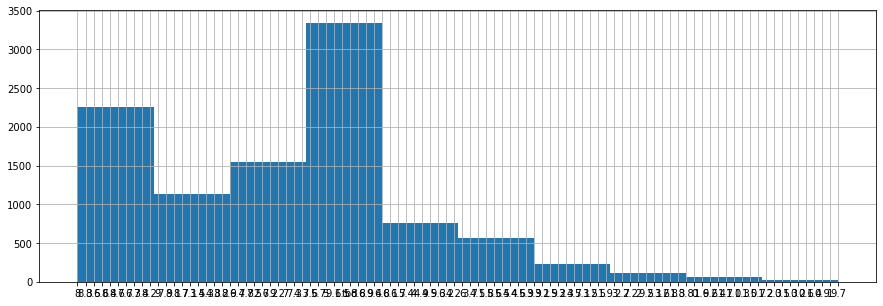

In [61]:
df['user_score'].hist(figsize = (15,5))
df['user_score'].describe()

Гистограмма получилас странная. Вероятно потому, что здесь все значения - строковые. Попробуем проанализировать только цифровые значения. 

In [62]:
df['user_score_numeric'] = df[df['user_score'] != 'tbd']['user_score']

In [63]:
df['user_score_numeric'] = pd.to_numeric(df['user_score_numeric'])

In [64]:
df['user_score_numeric'].describe()

count   7590.00
mean       7.13
std        1.50
min        0.00
25%        6.40
50%        7.50
75%        8.20
max        9.70
Name: user_score_numeric, dtype: float64

<AxesSubplot:>

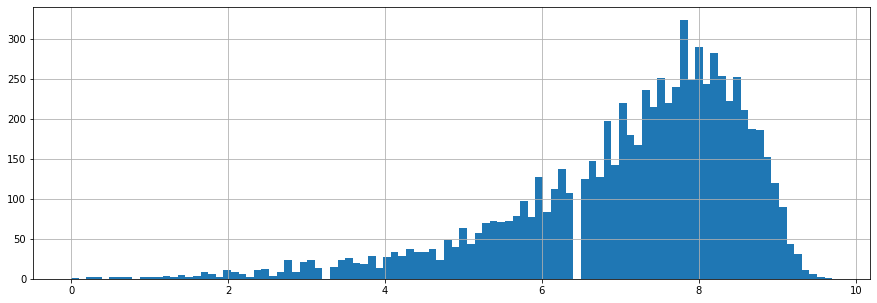

In [65]:
df['user_score_numeric'].hist(
    figsize = (15,5), 
    bins = 100)

Так картинка выглядит совершенно иначе и более правдоподобно.

Поле `user_score_numeric` нам больше не нужно, но т.к. объём небольшой, не будем его удалять. 

##### Поле `rating`

In [66]:
df['rating'].value_counts()

NotSet    6763
E         3990
T         2961
M         1563
E10+      1420
EC           8
RP           3
K-A          3
AO           1
Name: rating, dtype: int64

Неправдоподобного не вижу за исключением того, что некоторые рейтинги - очень редкие.

#### ВЫВОДЫ по разделу "Предобработка данных":

*Имена полей:*
* Все имена полей имели "кривой CamelType формат". Привёл их к формату snake_type.

*Изменене типа данных:*
* поменял тип данных на datetime в случае года выпуска игры. Это позволит удобнее работать далее с этим полем.
* хотел также изменить рейтинги пользовательские и критиков на int, но это не получилось сделать, т.к. в случае с рейтингом пользовательском произошло бы очень грубое округление, а в случае с `critic_score` - есть строковая переменная `tbd`, которую на корректное значение не изменить. Поэтому оба поля не трогал

*Пропуски:*
* Ряд полей имели пропуски. Строки с некоторыми из них можно было безболезненно удалить (где было 2 пропуска в поле `name`).
* поля `year_of_release`, `critic_score`, `user_score`, `rating` имеют большое количество пропусков. И если поле `year_of_release` можно было бы отбросить (т.к. количество пропусков всего 1.6%), то остальные из указанных полей имеют количество пропусков 40..50%, которые нельзя просто отбросить - их слишком много. При этом их нельзя и заполнить - это субъективные оценки, поэтому медианой их не заполнить. Поэтому оставил их как есть.

*Обработка аномалий:*

* аномалий не обнаружил.
* дубликатов нет.

<a id="step_3"></a>
## 3 = Анализ данных.
[к оглавлению](#back)

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим каждую задачу отдельно:

#### Cколько игр выпускалось в разные годы.
```Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?```

Для начала найдём сколько выпускалось игр вне зависимости от платформы. Если игра выходила на разных 3х разных платформах - посчитаем её 3 раза. 

In [68]:
da = df.pivot_table(
    index = 'year_of_release',
    values = 'name',
    aggfunc = 'count'
)
da = da.reset_index()
da

,year_of_release,name
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14
5,1985-01-01,13
6,1986-01-01,21
7,1987-01-01,16
8,1988-01-01,15
9,1989-01-01,17


Или более наглядно - количество игр, выходивших в разные годы:

<AxesSubplot:>

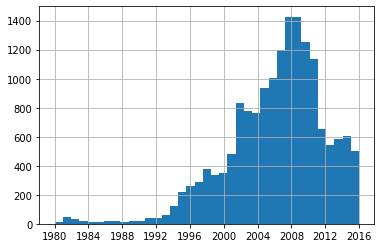

In [69]:
df['year_of_release'].hist(
    bins = 37
)

Но это неправильныйх подход - корректнее было бы посмотреть, сколько игр выходило вне зависимости от платформы.

In [70]:
dt = df.pivot_table(
    index = ['year_of_release', 'name'],
    values = 'world_sales',
    aggfunc = 'count'
)
dt

world_sales
year_of_release name                                                           
1980-01-01      Asteroids                                                     1
                Boxing                                                        1
                Bridge                                                        1
                Checkers                                                      1
                Defender                                                      1
...                                                                         ...
2016-01-01      Ys VIII: Lacrimosa of Dana                                    1
                Yuusha Shisu.                                                 1
                Zero Escape: Zero Time Dilemma                                2
                Zettai Kaikyuu Gakuen: Eden with Roses and Phan...            1
                ZombiU                                                        2

[12194 rows x 1 columns]

In [71]:
dt = dt.reset_index(level=[0,1])

In [72]:
dt

,year_of_release,name,world_sales
0,1980-01-01,Asteroids,1
1,1980-01-01,Boxing,1
2,1980-01-01,Bridge,1
3,1980-01-01,Checkers,1
4,1980-01-01,Defender,1
...,...,...,...
12189,2016-01-01,Ys VIII: Lacrimosa of Dana,1
12190,2016-01-01,Yuusha Shisu.,1
12191,2016-01-01,Zero Escape: Zero Time Dilemma,2
12192,2016-01-01,Zettai Kaikyuu Gakuen: Eden with Roses and Pha...,1


In [73]:
dt2 = dt.pivot_table(
    index = 'year_of_release',
    values = 'name',
    aggfunc = 'count'
)
dt2 = dt2.reset_index()
dt2

,year_of_release,name
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14
5,1985-01-01,13
6,1986-01-01,21
7,1987-01-01,16
8,1988-01-01,15
9,1989-01-01,17


Построим гистограмму зависимости выхода игр от года.

In [74]:
df.query('year_of_release == "2009"')['world_sales'].sum()

658.8200000000002

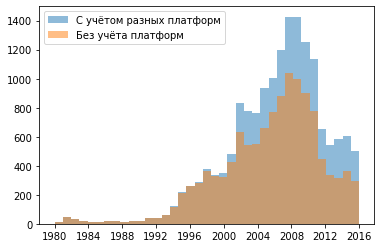

In [75]:
plt.hist(
    df['year_of_release'], 
    label='С учётом разных платформ',
    bins = 37,
    alpha = 0.5
)

plt.hist(
    dt['year_of_release'], 
    label='Без учёта платформ',
    bins = 37,
    alpha = 0.5
)

plt.figsize=(18,18)
plt.legend()
plt.show()

Таким образом видно, что количество игр, если не учитывать платформу, гораздо меньше (например, в 2016 году на треть), нежели если её учитывать.

Касательно ответа на вопрос ***Важны ли данные за все периоды?***, то очевидно, что зависит от того, для чего важны?

Похоже, что данные до 2008 года вряд ли будут полезны для прогноза на 2017 год.

#### Изменение продаж про платформам.

```Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.```

##### ТОП-5 наиболее популярных платформ.

Посмотрим топ 5, какие платформы имели наибольшие продажи:

In [76]:
df.groupby('platform')['world_sales'].sum().sort_values(ascending=False).head(5)

platform
PS2    1255.77
X360    971.42
PS3     939.65
Wii     907.51
DS      806.10
Name: world_sales, dtype: float64

Теперь нужно посмотреть на то, как изменялись продажи из года в год. Для начала попробуем по всем платформам:

In [77]:
platforms = df['platform'].unique()
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

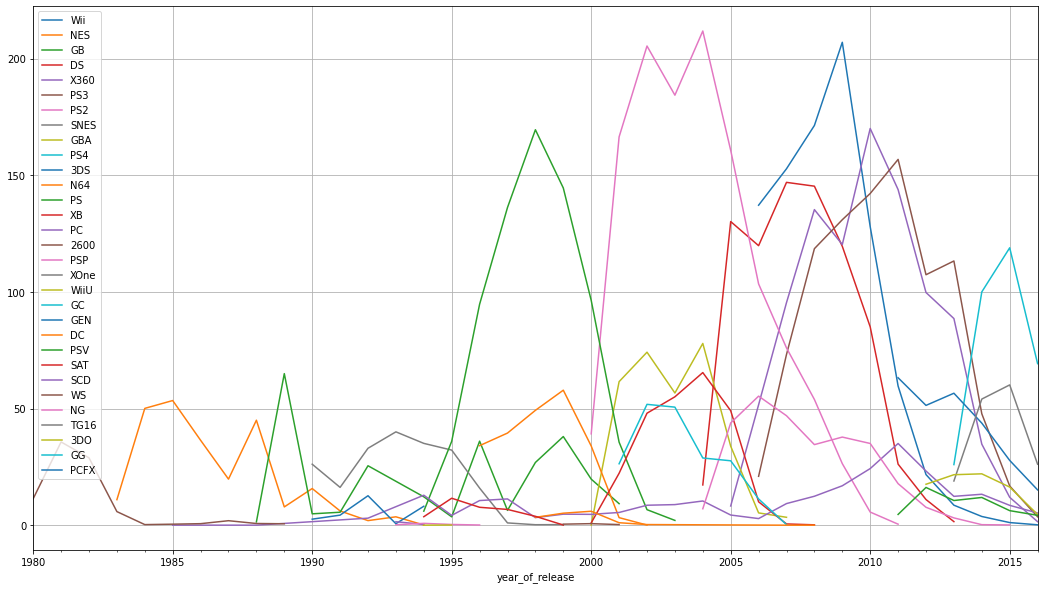

In [78]:
for p in platforms:
    df.query('platform == @p').groupby('year_of_release')['world_sales'].sum().plot(
        figsize = (18,10),
        grid = True,
        label = p,
        legend = True
    )

Выведем их по-отдельности:

Wii


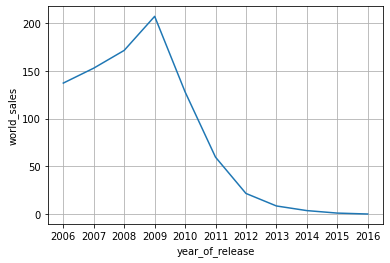

NES


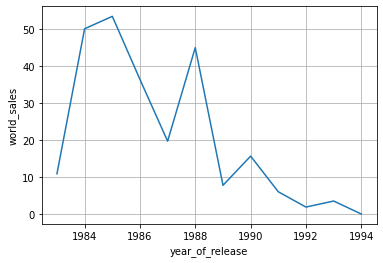

GB


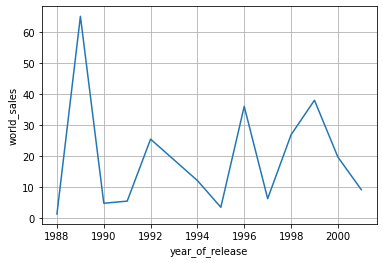

DS


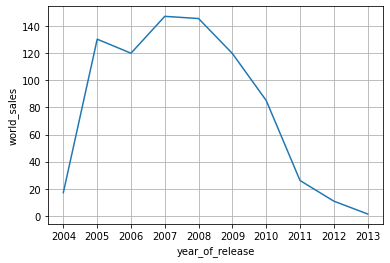

X360


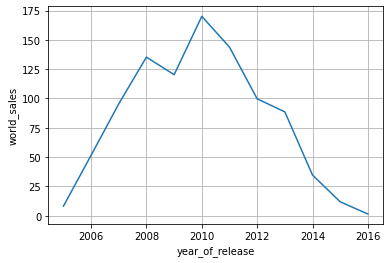

PS3


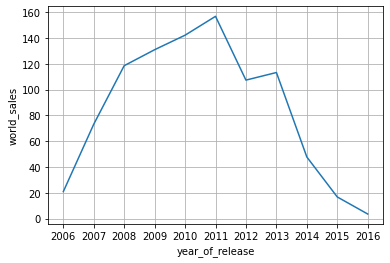

PS2


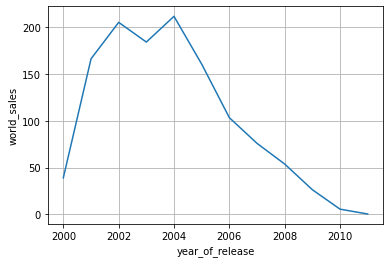

SNES


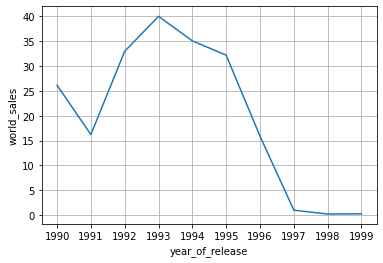

GBA


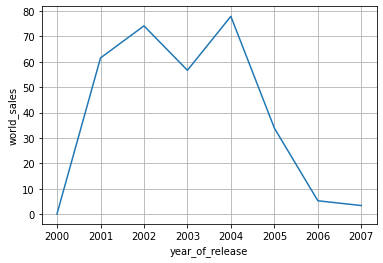

PS4


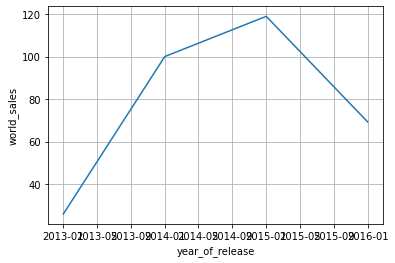

3DS


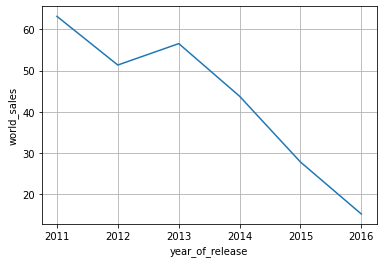

N64


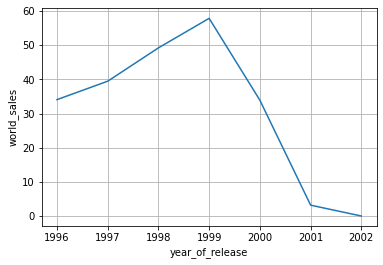

PS


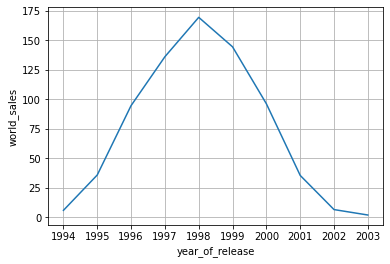

XB


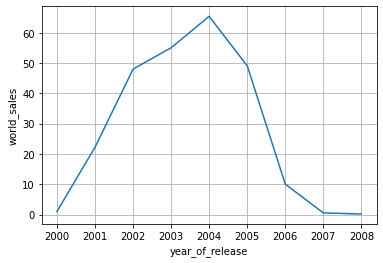

PC


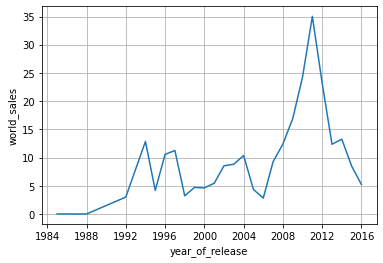

2600


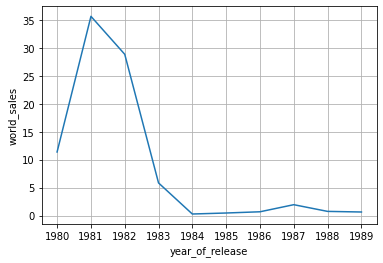

PSP


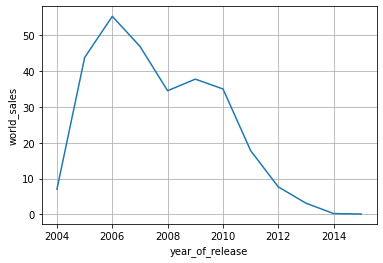

XOne


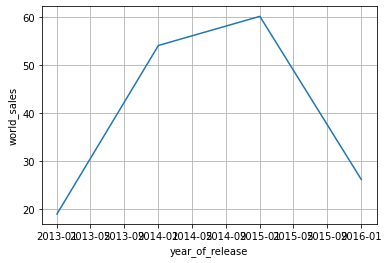

WiiU


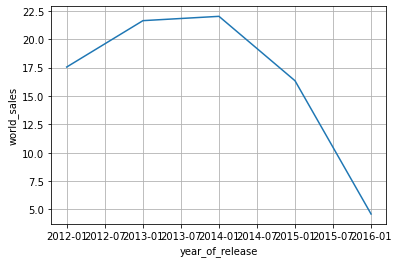

GC


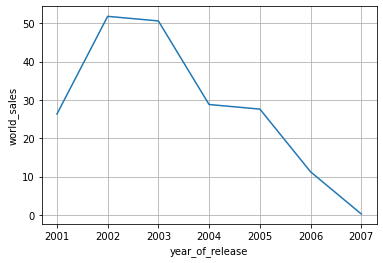

GEN


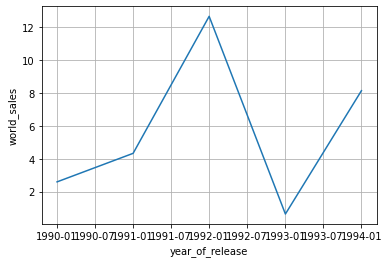

DC


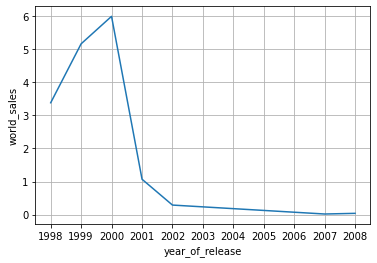

PSV


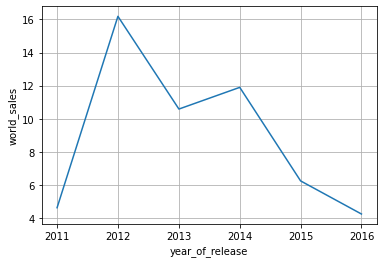

SAT


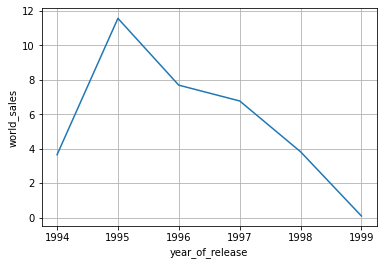

SCD


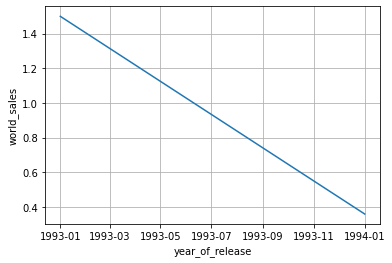

WS


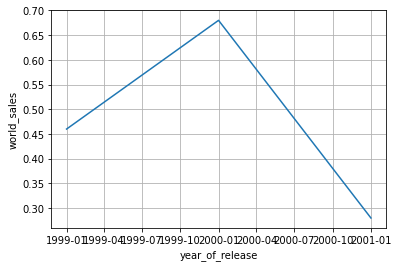

NG


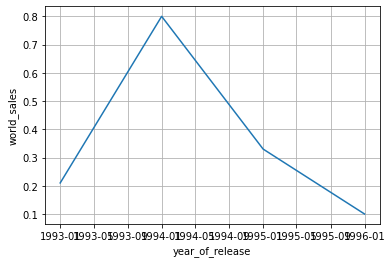

TG16


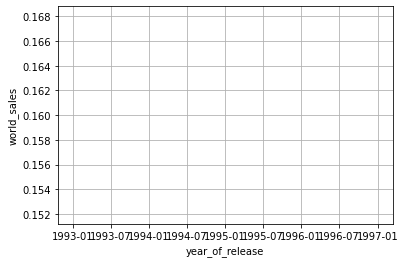

3DO


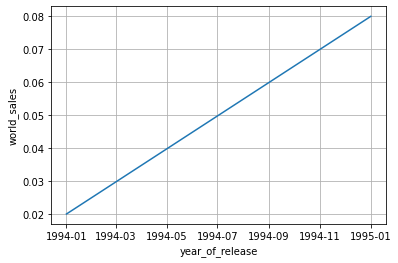

GG


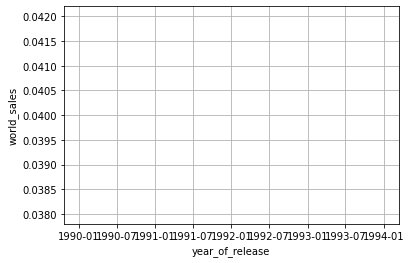

PCFX


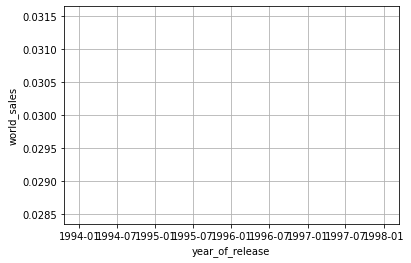

In [79]:
for p in platforms:
    ax = sns.lineplot(
        x = 'year_of_release', 
        y = 'world_sales',
        data = df.query('platform == @p').groupby('year_of_release').sum()
    )
    print(p)
    plt.grid()
    plt.show()    

получилось не очень информативно, хотя какие-то выводы уже можно сделать.

Но лучше рассмотреть попближе ТОП-5:

[]

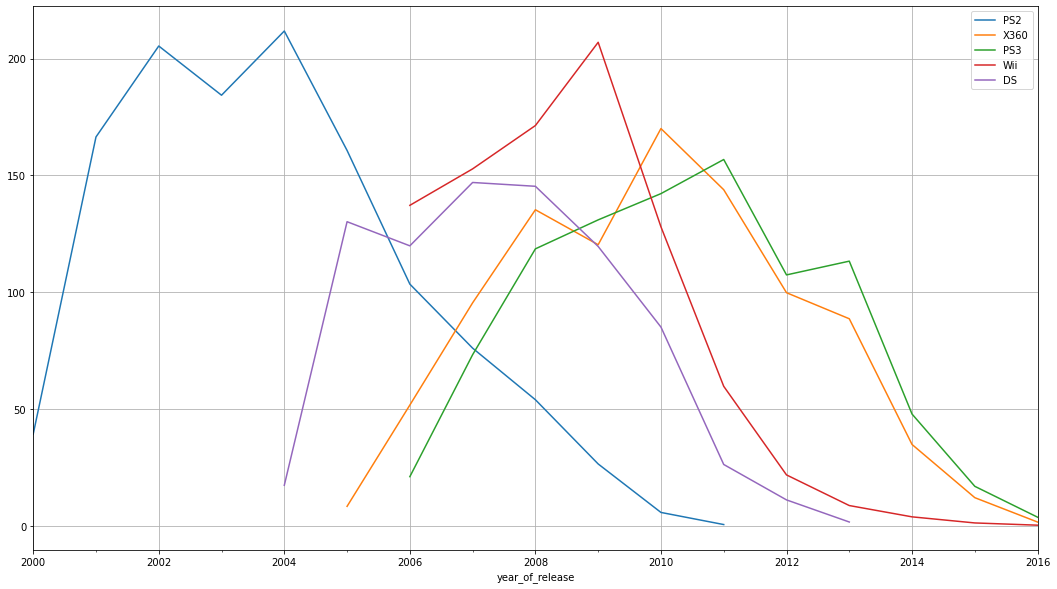

In [80]:
platforms_5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for p in platforms_5:
    df.query('platform == @p').groupby('year_of_release')['world_sales'].sum().plot(
        figsize = (18,10),
        grid = True,
        label = p,
        legend = True
        )
plt.plot()

Выведем их по-отдельности:

PS2


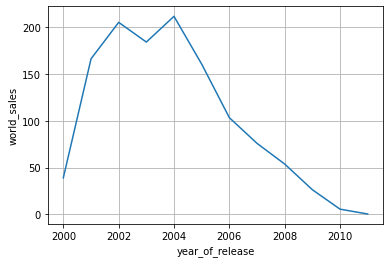

X360


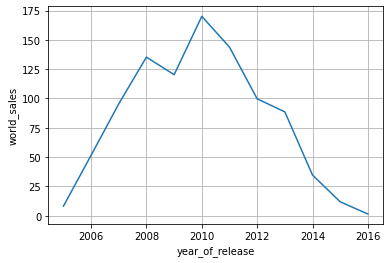

PS3


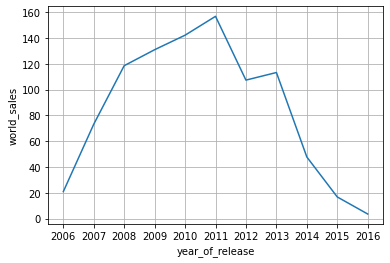

Wii


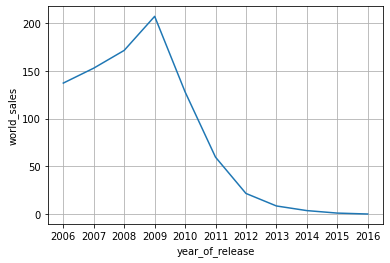

DS


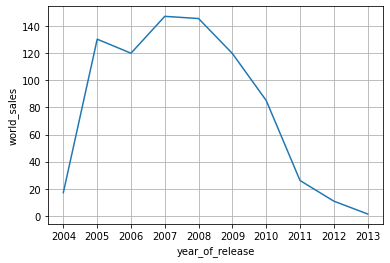

In [81]:
for p in platforms_5:
    ax = sns.lineplot(
        x = 'year_of_release', 
        y = 'world_sales',
        data = df.query('platform == @p').groupby('year_of_release').sum()
    )
    print(p)
    plt.grid()
    plt.show()   

###### Выводы по подразделу:
* популярность **любой** платформы не вечна - она длится 4-5 лет, потом сходит на нет. Поэтому смотреть на самые большие по объёму платформы не стоит - их пик уже скорее всего пройден. Нужно смотреть на платформы, которые начали расти несколько лет назад. Поэтому возьмём данные по платформам за последние 5 лет.

##### Найдём растущие платформы

* `Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.`

Создадим датафрейм `dz`, куда отберём только информацию по тем играм, которые были выпущены после 2014 года включительно.

In [82]:
dz = df.query('year_of_release >= 2014')

Wii


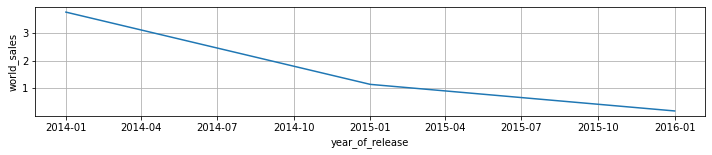

DS


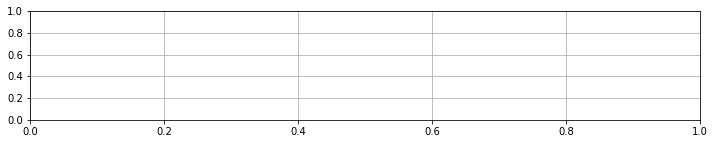

X360


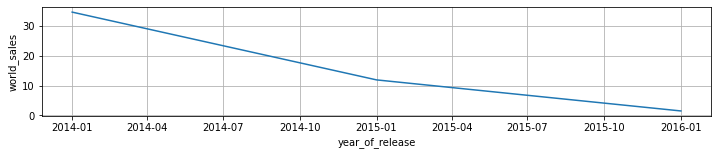

PS3


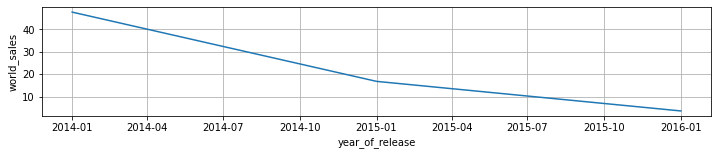

PS4


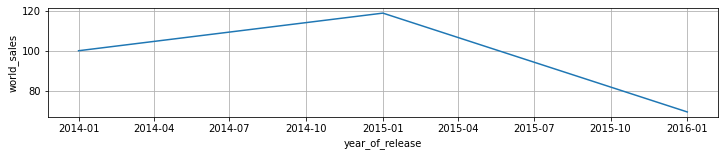

3DS


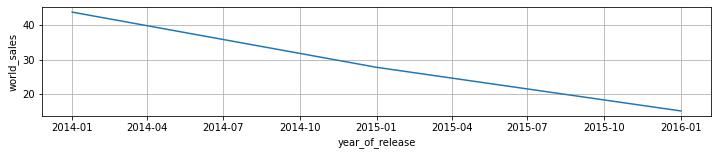

PC


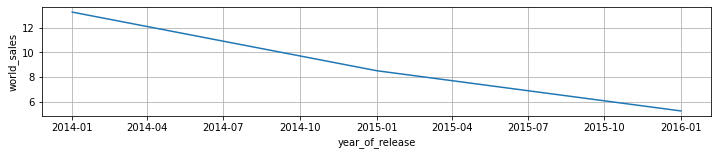

PSP


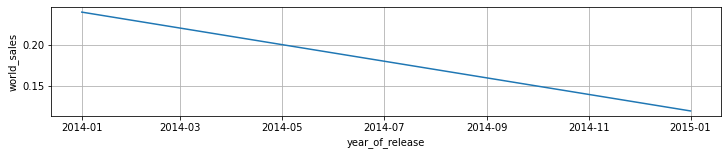

XOne


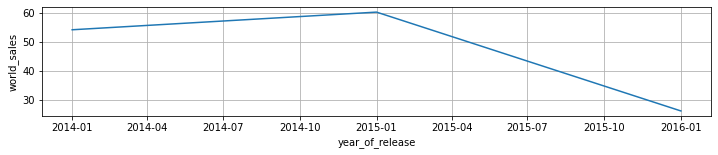

WiiU


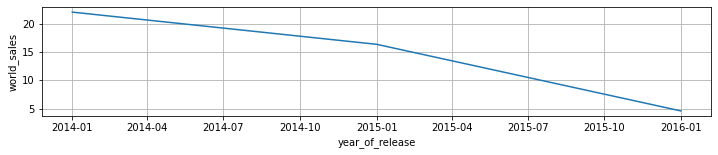

PSV


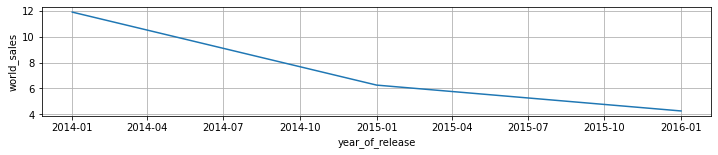

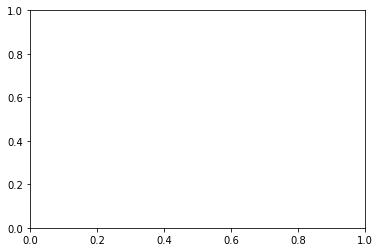

In [83]:
for p in platforms:
    ax = sns.lineplot(
        x = 'year_of_release', 
        y = 'world_sales',
        data = dz.query('platform == @p').
        groupby('year_of_release').sum()
    )
    if df.query('platform == @p and year_of_release > 2012 and year_of_release < 2016')['world_sales'].sum() > 0:
        print(p)
        plt.grid()
        fig = plt.gcf()
        fig.set_size_inches(12, 2)
        plt.show()

###### Выводы по подразделу:
Из этого получается, что все падают, кроме двух растущих на конец 2015 года - это **PS4** и **XOne**. Это значит, что они будут приносить прибыль ещё несколько лет. И дальше также пойдут на спад.

##### Boxplot по глобальным продажам игр в разбивке по платформам

* `Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.`

In [84]:
dz.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PC,151.00,0.18,0.33,0.01,0.02,0.06,0.20,3.05
PS3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
PSP,13.00,0.03,0.03,0.01,0.01,0.02,0.02,0.09
PSV,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96
Wii,11.00,0.46,0.63,0.01,0.04,0.18,0.76,2.01
WiiU,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
X360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28


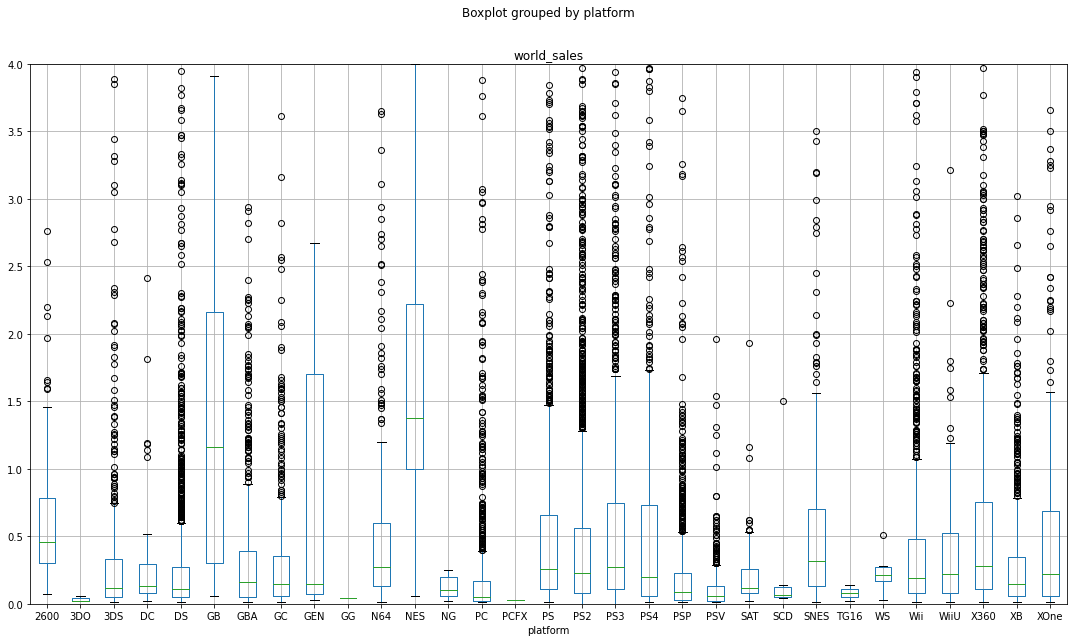

In [86]:
ax = df.boxplot(
    column = ['world_sales'], 
    by='platform',
    figsize = (18,10)
    )
ax.set_ylim([0, 4])
None

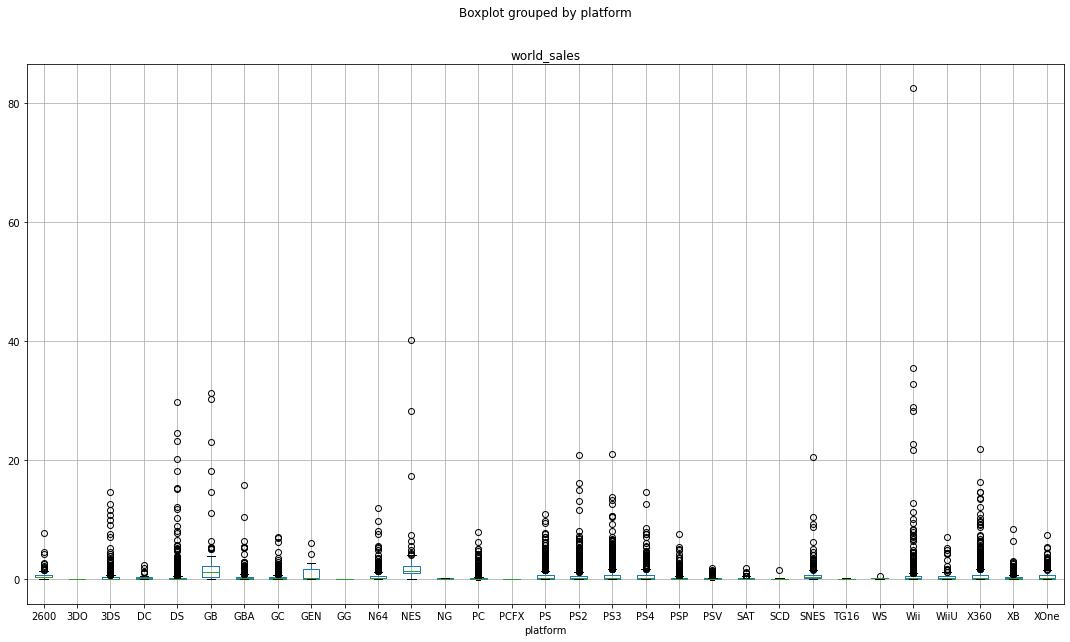

In [87]:
ax = df.boxplot(
    column = ['world_sales'], 
    by='platform',
    figsize = (18,10)
    )
#ax.set_ylim([0, 4])
None


Здесь видно, насколько большой был разброс в некоторых играх- аж до 80+ млн долл сумма продаж. На предыдущем графике, где по Y ограничено до 4 млн - этого не видно.

Посмотрим, что это за игры:

In [88]:
df[df['world_sales'] > 35]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,user_score_numeric
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,8.00
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NotSet,40.24,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,8.30


Но всё же нас интересуют тенденции, поэтому здесь и далее будем работать только с играми, выпущенными после 2014 года включительно: 

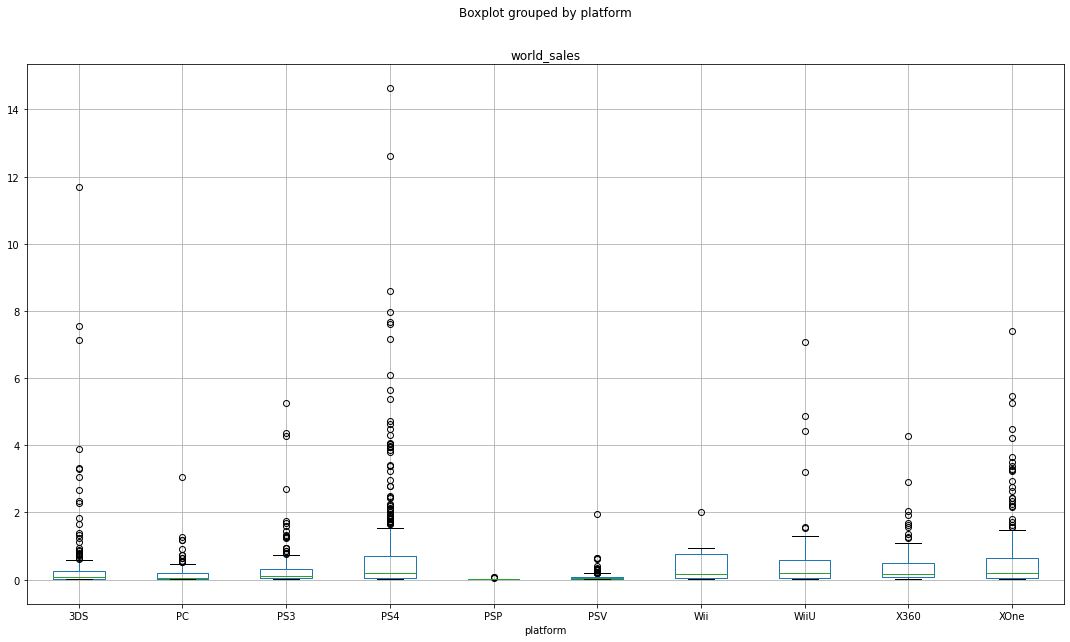

In [89]:
ax = dz.boxplot(
    column = ['world_sales'], 
    by='platform',
    figsize = (18,10)
    )
#ax.set_ylim([0, 4])
None

Посмотрим на лидеров:

In [90]:
dz[dz['world_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,user_score_numeric
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NotSet,14.63,NaN
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.00,8.3,M,12.62,8.30
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NotSet,11.68,NaN


Посмотрим подробнее на медианные значения:

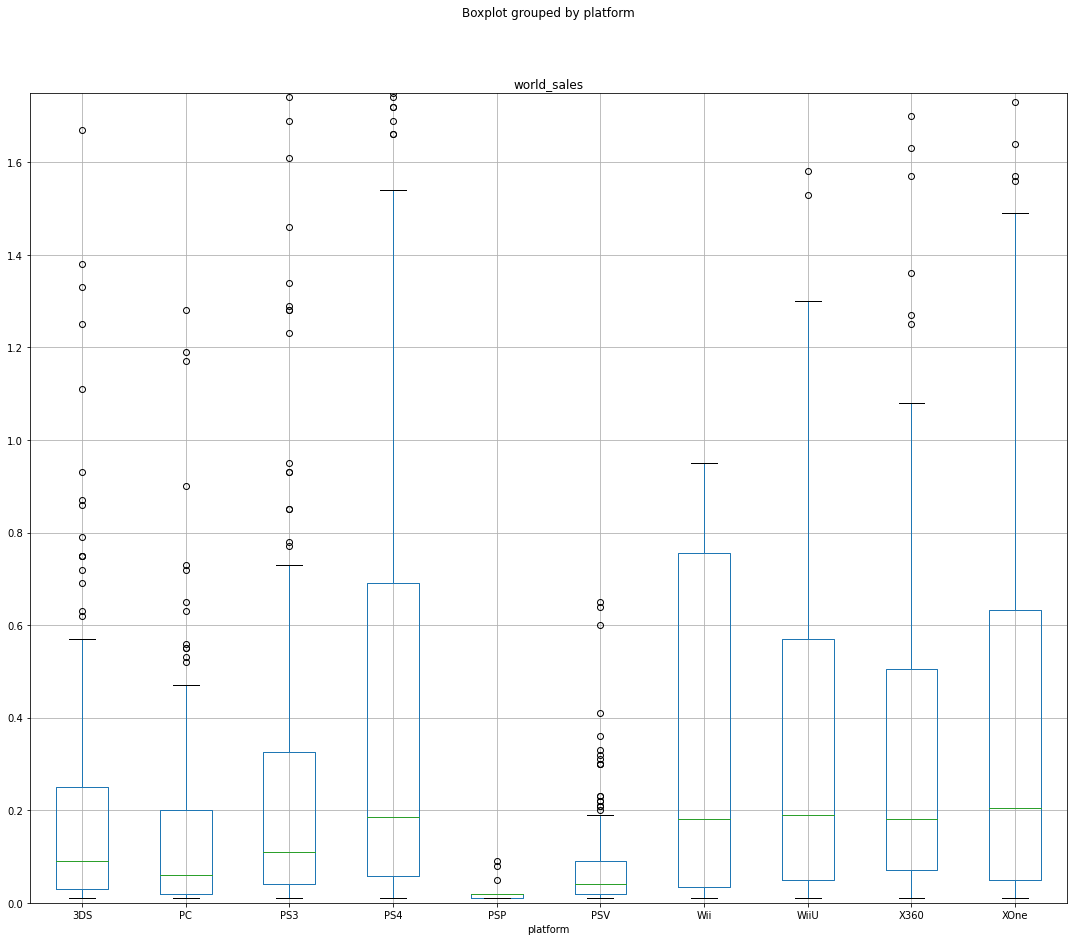

In [91]:
ax = dz.boxplot(
    column = ['world_sales'], 
    by='platform',
    figsize = (18,15)
    )
ax.set_ylim([0, 1.75])
None

###### Выводы по подразделу:


Что можно сказать по этому графику (и describe, который ранее описан):
* популярность платформ очень сильно отличается, во-первых, по количеству выпущенных игр. Это заметно: 
 * и на всех выпущенных платформах. На некоторых, судя по всему выпустили всего по несколько игр (GG, 3DO, PCFX). На других - на порядки больше (DS, PS2).
 * и на современных - доходы от PSP крайне небольшие. При этом большие средние доходы для Wii, PS4, XOne. При этом напомню, что первпективные = растущие у нас - это PS4 и XOne.
* Второй параметр - медианное значение выручки с проданных игр также очень сильно отличается. У половины платформ медианная выручка меньше 100 000 долл (3DS, PC, PS3, PSP, PSV), а у другой (XOne, X360, WiiU, Wii, PS4) - ближе к 200 000 долл. Понятно, что лучше целиться на те платформы, где медианные значения больше.

##### Влияние отзывов на продажи.

`Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.` 

`Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.`

In [92]:
platforms_new = dz['platform'].unique()
platforms_new

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

platform = PS4
              critic_score  world_sales
critic_score          1.00         0.40
world_sales           0.40         1.00


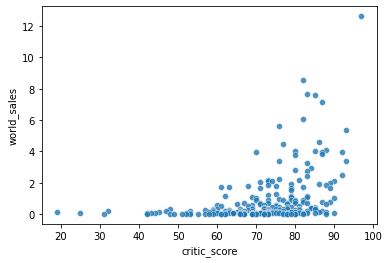

                    user_score_numeric  world_sales
user_score_numeric                1.00        -0.03
world_sales                      -0.03         1.00


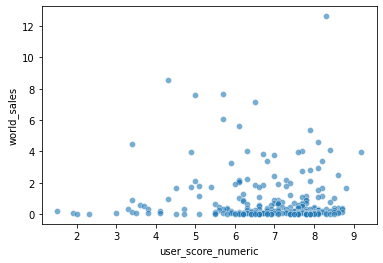

platform = 3DS
              critic_score  world_sales
critic_score          1.00         0.31
world_sales           0.31         1.00


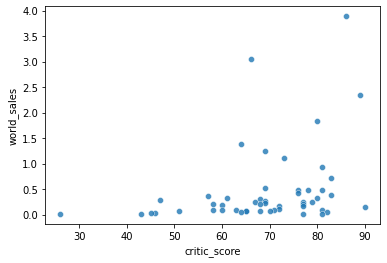

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.22
world_sales                       0.22         1.00


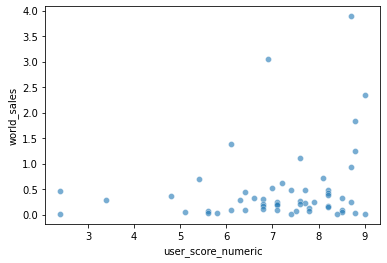

platform = XOne
              critic_score  world_sales
critic_score          1.00         0.43
world_sales           0.43         1.00


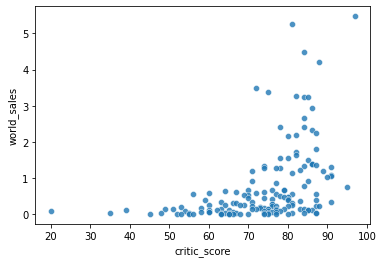

                    user_score_numeric  world_sales
user_score_numeric                1.00        -0.07
world_sales                      -0.07         1.00


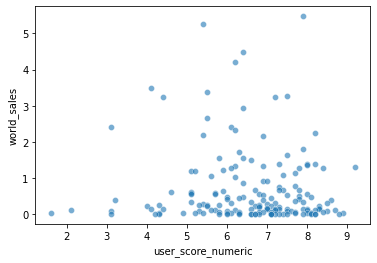

platform = WiiU
              critic_score  world_sales
critic_score          1.00         0.37
world_sales           0.37         1.00


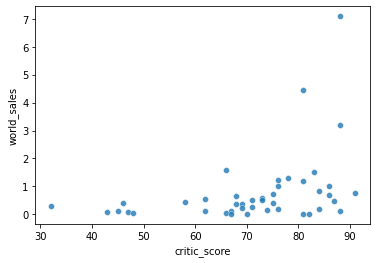

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.40
world_sales                       0.40         1.00


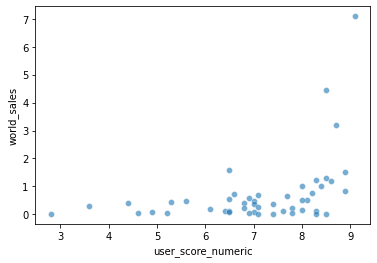

platform = PS3
              critic_score  world_sales
critic_score          1.00         0.45
world_sales           0.45         1.00


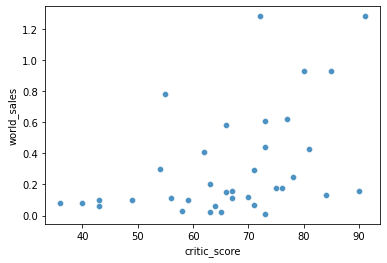

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.13
world_sales                       0.13         1.00


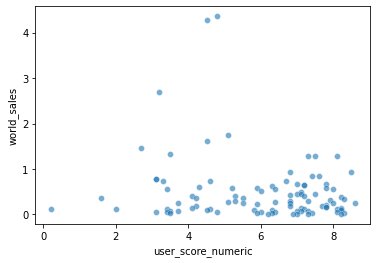

platform = X360
              critic_score  world_sales
critic_score          1.00         0.53
world_sales           0.53         1.00


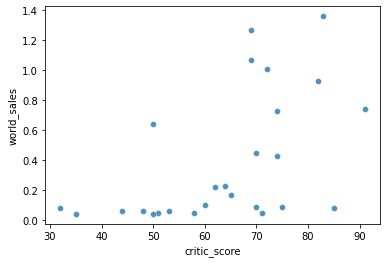

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.11
world_sales                       0.11         1.00


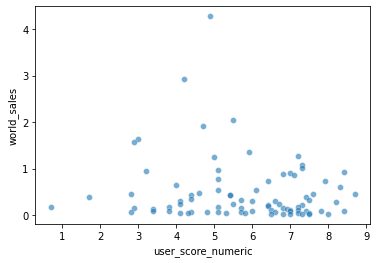

platform = PC
              critic_score  world_sales
critic_score          1.00         0.17
world_sales           0.17         1.00


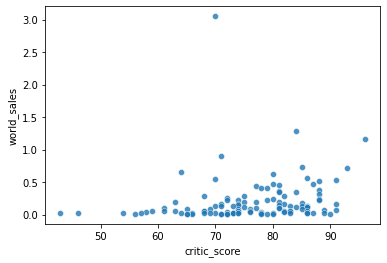

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.01
world_sales                       0.01         1.00


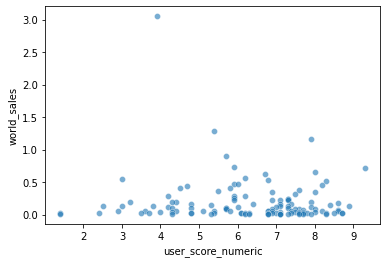

platform = Wii
              critic_score  world_sales
critic_score           NaN          NaN
world_sales            NaN         1.00


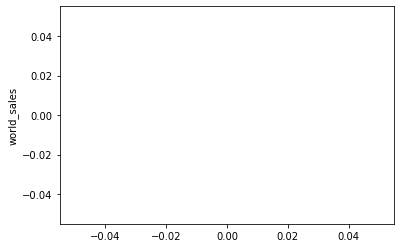

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.11
world_sales                       0.11         1.00


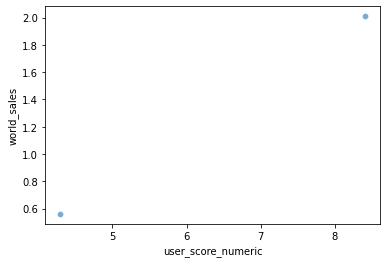

platform = PSV
              critic_score  world_sales
critic_score          1.00         0.04
world_sales           0.04         1.00


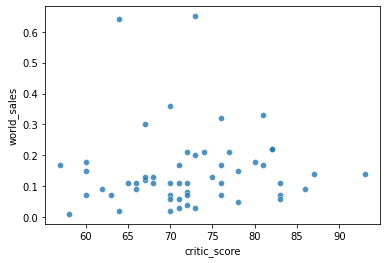

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.01
world_sales                       0.01         1.00


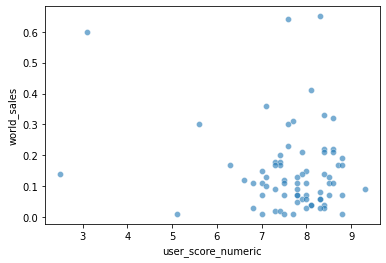

platform = PSP
              critic_score  world_sales
critic_score           NaN          NaN
world_sales            NaN         1.00


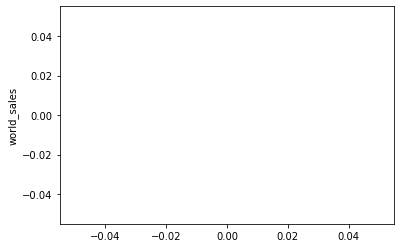

                    user_score_numeric  world_sales
user_score_numeric                1.00         0.22
world_sales                       0.22         1.00


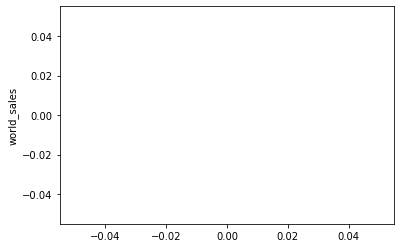

In [93]:
for i in platforms_new:
    print('platform =', i)
    print(dz.query('platform == @i and world_sales > 0').loc[:, ['critic_score', 'world_sales']].corr())
    sns.scatterplot(
        data = dz.query('platform == @i and world_sales > 0'),
        x = 'critic_score', 
        y = 'world_sales',
        alpha = 0.8
    )
    plt.show()

    print(df.query('platform == @i and world_sales > 0').loc[:, ['user_score_numeric', 'world_sales']].corr())
    sns.scatterplot(
        data = dz.query('platform == @i and world_sales > 0'),
        x = 'user_score_numeric', 
        y = 'world_sales',
        alpha = 0.6    
        )

    plt.show()

`Соотнесите выводы с продажами игр на других платформах.`

###### Выводы по подразделу:


Таким образом видно, что несмотря на то, что на графиках проглядывается прямая зависимость выручки от отзывов как критиков, так и пользователей, на продажи отзывы влияют слабо. 

Для большей части игр корреляция вообще околонулевая - по Шкале Чеддока - очень слабая. 

Для некоторых платформ (PS3) такая корреляция достигает 0.45 (слабая по Чеддоку), что всё равно говорит о слабой корреляции.

##### Распределение по жанрам.

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [94]:
dx = dz.pivot_table(
    index = 'genre',
    values = 'world_sales',
    #aggfunc = ['count', 'sum']
    #aggfunc = 'count'
    aggfunc = 'sum'
)
dx = dx.sort_values('world_sales', ascending=False).reset_index()
dx

,genre,world_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


Видно, что разные жанры могут существенно отличаться по объёму продаж. Жанры с самой большой выручкой - более миллиарда долларов выручки: 
* Action (199)
* Sports (171)
* Shooter (109)

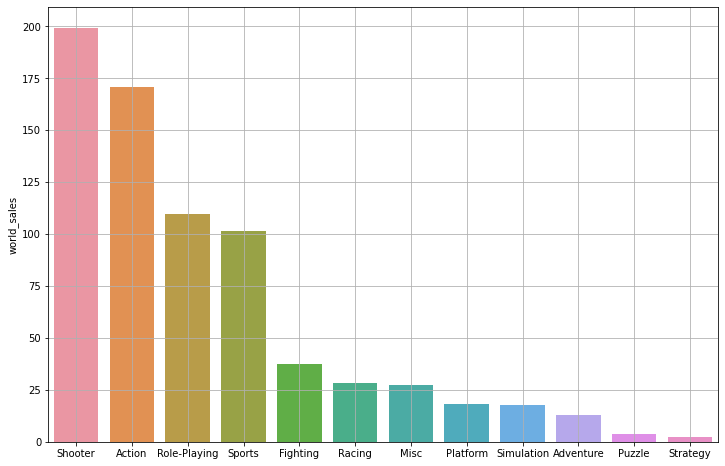

In [95]:
ax = sns.barplot(x = dz['genre'].unique(), 
                 y = dz.groupby('genre')['world_sales'].sum().sort_values(ascending = False)
                 )
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.grid()
plt.show()

По сумме продаж в зависимости от жанра видно, сколько в сумме получилось продать игр определённого жанра. Но это в сумме - не видно, насколько оказались игры определённого жанра в среднем на одну игру (точнее, какое медианное значение).

Для начала посмотрим на общее количество игр, выпущенных в каждом жанре:

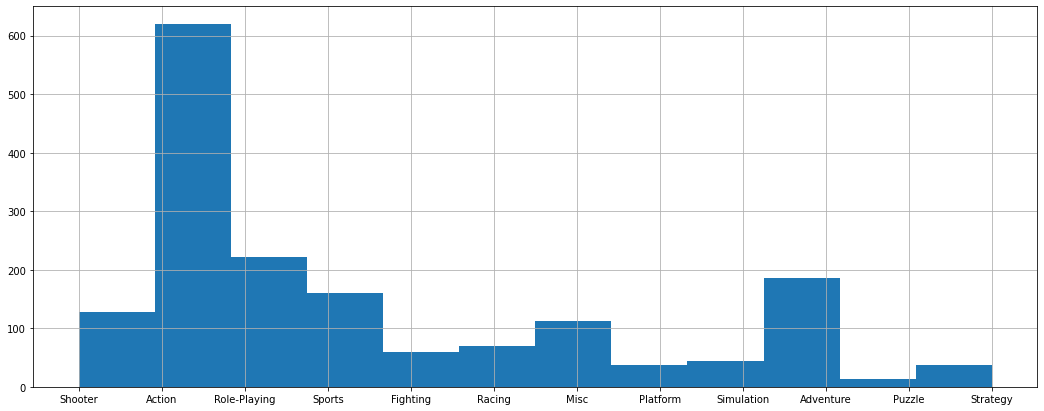

In [96]:
dz['genre'].hist(
    figsize = (18,7),
    bins = 12,
    #orientation = 'horizontal',
    align = 'mid'
)
None

Здесь видно, что Action и Sports не только самые большие по объёму продаж, но также и по количеству выпущенных игр в них. То есть средняя вырукча на игру там будет не очень выдающееся. А вот в жанре Shooter, который находится на третьем месте по выручке, на самом игр непропорциоанльно мало. Это значит, что шанс получить хит в этом жанре выше. 

Чтоб оценить, насколько вероятно получить выручку выше среднего, правильно было бы посмотреть на медианные значения по каждому жанру. Удобнее это сделать с помощью боксплотов.

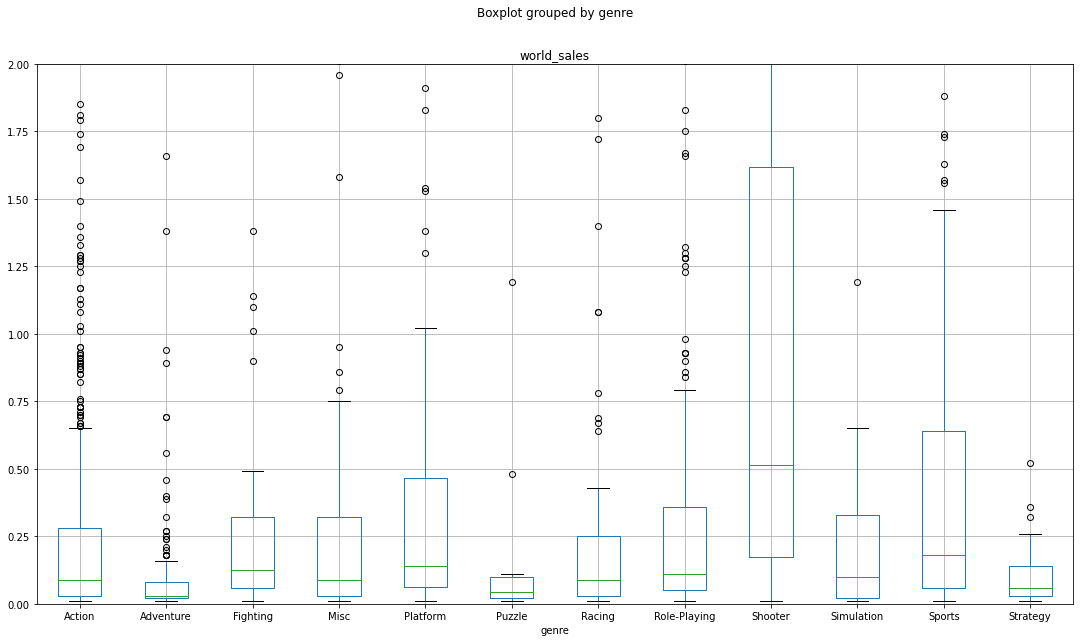

In [97]:
ax = dz.boxplot(
    column = ['world_sales'], 
    by='genre',
    figsize = (18,10)
    )
ax.set_ylim([0, 2])
None

Выводы относительно распределения продаж по жанрам:

* здесь видно, что жанры, лидирующие по объёму продаж, имеют средние медианные значения, а вот медианных значения менее объёмных жанров, есть существенно больше, выделим некоторые жанры:

* Shooter, Sports, Platformer - имеют первое по величине медианное значение, а также высокий третий процентиль, а также самое высокое значение четвёртого квартиля, а также самое высокое значение первого квартиля. То есть игр здесь меньше, но вероятность получить хит - выше всех остальных. 

* Adventures, Strategy и Puzzle - самые неудачные с точки зрения продаж - у них самые маленькие медианы и короткие хвосты.

###### Выводы по подразделу:
Если стоит задача - какую игру создавать, то можно дать следующие рекомендации:
* не делать игры непопулярных жанров: Puzzle, Strategy и Adventure;
* варианты с низким и средим риском и средними оборотами по продажам (высоким спросом) - Sports, Action
* Варанты с высоким риском и потенциально высокой отдачей - Platform, Shooter.

#### Выводы по разделу "Анализ данных"

* популярность **любой** платформы не вечна - она длится 4-5 лет, потом сходит на нет. Поэтому смотреть на самые большие по объёму платформы не стоит - их пик уже скорее всего пройден. Нужно смотреть на платформы, которые начали расти несколько лет назад. Поэтому возьмём данные по платформам за последние 5 лет.
* на конец 2015 года растут только две платформы  - это PS4 и XOne. Это значит, что они будут приносить прибыль ещё несколько лет. И дальше также пойдут на спад. А в создание игр на остальных платформах не стоит фокусироваться. 
* популярность платформ очень сильно отличается, во-первых, по количеству выпущенных игр. На некоторых, судя по всему выпустили всего по несколько игр (GG, 3DO, PCFX). На других - на порядки больше (DS, PS2).
Второй параметр - медианное значение выручки с проданных игр также очень сильно отличается. У подавляющего большинства платформ - медианная выручка составляет порядка сотен тысяч долларов, у единиц - более миллиона долларов за игру (GB, NES).
обратим внимание, что обе эти платформы - достаточно старые. Почему-то им удалось сделать хиты, каждый из которых смог собрать большую кассу. Из боксплотов этого не видно, но нужно взять на заметку.
* видно, что несмотря на то, что на графиках проглядывается прямая зависимость выручки от отзывов как критиков, так и пользователей, на продажи отзывы влияют слабо. Для большей части игр корреляция вообще околонулевая. Для некоторых платформ (PS3) такая корреляция достигает 0.43, что всё равно говорит о слабой корреляции.
* Если стоит задача - какую игру создавать, то можно дать следующие рекомендации:
* * не делать игры непопулярных жанров: Puzzle, Strategy и Adventure;
 * варианты с низким и средим риском и средними оборотами по продажам (высоким спросом) - Sports, Action
 * Варанты с высоким риском и потенциально высокой отдачей - Platform, Shooter.

<a id="step_4"></a>
## 4 = Портрет пользователя каждого региона.
[к оглавлению](#back)



#### Портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):

Для начала определимся, что значит "портрет региона"? 
Региона - значит самые популярные игры в данном регионе. А популярные - это, положим, ТОП-25.

Положим, это ТОП-25. "Портрет" - значит можно для этих игр определить некоторые их характеристики, которые не относятся а) к выручке и б) к субъективной оценке. Остаются:
* жанр, 
* платформа, 
* рейтинг.

##### Регион NA

Начнём с региона "Северная Америка". Выберем топ-25 игр по продажам. Брать будем не все, а за последние 3+ года, т.к очевидно, что игровой рынок в 1990х будет сильно отличаться от современного.

In [98]:
df_na = df.query('year_of_release > 2013').sort_values(by='na_sales', ascending = False).head(25)


Теперь в этой подборке определим, какие самые популяные жанры, какого рейтинга, и на какой платформе. Считать будем по количеству игр определённого жанра, хотя, вероятно, стоит считать по суммарной выручке.

In [99]:
df_na_genres = df_na.pivot_table(
    index = 'genre',
    values = 'na_sales',
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False)

df_na_genres

,na_sales
genre,
Shooter,34.47
Role-Playing,12.37
Action,11.11
Sports,6.91
Fighting,5.87
Racing,3.15


In [100]:
df_na_platforms = df_na.pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False)

df_na_platforms

,na_sales
platform,
PS4,27.71
XOne,27.05
3DS,10.60
WiiU,5.75
X360,2.77


In [101]:
df_na_ratings = df_na.pivot_table(
    index = 'rating',
    values = 'na_sales',
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending = False)

df_na_ratings

,na_sales
rating,
NotSet,28.85
M,25.49
T,9.48
E,7.57
E10+,2.49


##### Регион EU

In [102]:
df_eu = df.query('year_of_release > 2013').sort_values(by='eu_sales', ascending = False).head(25)


In [103]:
df_eu_genres = df_eu.pivot_table(
    index = 'genre',
    values = 'eu_sales',
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False)

df_eu_genres

,eu_sales
genre,
Shooter,25.84
Sports,23.39
Action,12.57
Role-Playing,8.89
Misc,4.39
Racing,2.15


In [104]:
df_eu_platforms = df_eu.pivot_table(
    index = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False)

df_eu_platforms 

,eu_sales
platform,
PS4,57.73
XOne,8.47
PS3,5.39
3DS,3.49
WiiU,2.15


In [105]:
df_eu_ratings = df_eu.pivot_table(
    index = 'rating',
    values = 'eu_sales',
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending = False)

df_eu_ratings

,eu_sales
rating,
M,25.78
E,25.54
NotSet,21.34
T,4.57


##### Регион JP

In [106]:
df_jp = df.query('year_of_release > 2013').sort_values(by='jp_sales', ascending = False).head(25)


In [107]:
df_jp_genres = df_jp.pivot_table(
    index = 'genre',
    values = 'jp_sales',
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False)

df_jp_genres

,jp_sales
genre,
Role-Playing,16.64
Action,8.82
Fighting,3.24
Platform,1.73
Misc,1.62
Shooter,1.46
Simulation,1.40
Racing,1.28


In [108]:
df_jp_platforms = df_jp.pivot_table(
    index = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False)

df_jp_platforms

,jp_sales
platform,
3DS,29.82
WiiU,4.49
PSV,0.90
PS3,0.49
PS4,0.49


In [109]:
df_jp_ratings = df_jp.pivot_table(
    index = 'rating',
    values = 'jp_sales',
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending = False)

df_jp_ratings

,jp_sales
rating,
NotSet,26.35
E,4.41
T,3.48
E10+,1.46
M,0.49


##### размер каждого рынка в деньгах:

In [111]:
print('Доля рынка NA = ', dz['na_sales'].sum() / dz['world_sales'].sum())

Доля рынка NA =  0.3894166838028652


In [112]:
print('Доля рынка EU = ', dz['eu_sales'].sum() / dz['world_sales'].sum())

Доля рынка EU =  0.37107409692233867


In [113]:
print('Доля рынка JP = ', dz['jp_sales'].sum() / dz['world_sales'].sum())

Доля рынка JP =  0.12761669751182397


|Регион|Доля рынка, %|
|--|--|
|NA|39|
|EU|37|
|NA|13|

**Сделаем наглядно:**

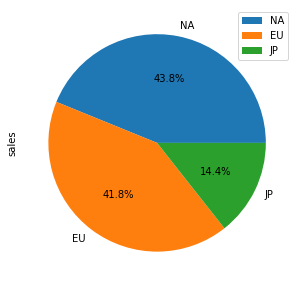

In [114]:
dd = pd.DataFrame(
    {
        'sales': [dz['na_sales'].sum(), dz['eu_sales'].sum(), dz['jp_sales'].sum()]
    },
    index = ['NA', 'EU', 'JP'],
)

plot = dd.plot.pie(
    y = 'sales',
    figsize = (5,5),
    autopct='%1.1f%%'
)

In [115]:
dd

,sales
NA,284.06
EU,270.68
JP,93.09


Важный вывод отсюда: более 85% общемирового рынка занимают продажи в Европе и Северной Америке.
Чуть менее 15% - приходится на Японию.

#### Сравнение предпочитаемых жанров в разных регионах:

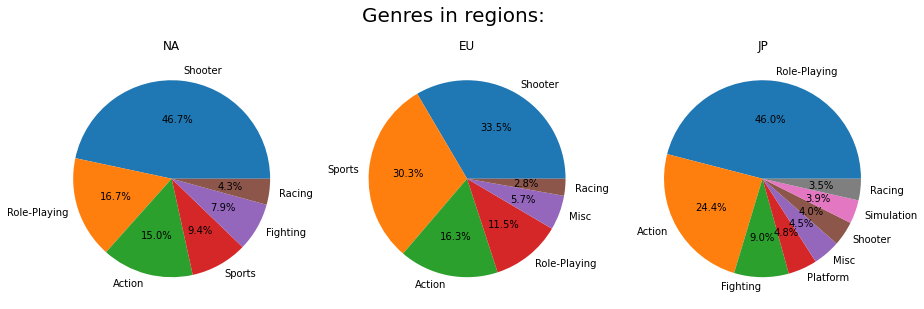

In [116]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Genres in regions:', fontsize=20)
axs[0].pie(df_na_genres.na_sales, labels=df_na_genres.index, autopct='%1.1f%%')
axs[0].set_title("NA")

axs[1].pie(df_eu_genres.eu_sales, labels=df_eu_genres.index, autopct='%1.1f%%')
axs[1].set_title("EU")

axs[2].pie(df_jp_genres.jp_sales, labels=df_jp_genres.index, autopct='%1.1f%%')
axs[2].set_title("JP")
#ax.axis("equal")

plt.show()

<a id="imp"></a>

##### Выводы по разделу:

Данные относятся к 2013-2016.

* предпочтения по жанрам видны на графиках выше.
* Шутеры являются одним из лидирующих жанров в США (46%) и Европе (34%), при этом почти не популярны в Японии.
* Экшн - на них приходится 15-16% продаж в США / Европе и 25 - в Японии.
* Спортивные - любят только в Европе (33%)
* Ролевые - в Японии (46%) и немного в США (16%)

Самый важный вывод отсюда - "денежные" жанры для разработки - это Шутеры и Экшн. Остальные - сильно нишевые.

#### Различия в долях продаж платформ по регионам.
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.

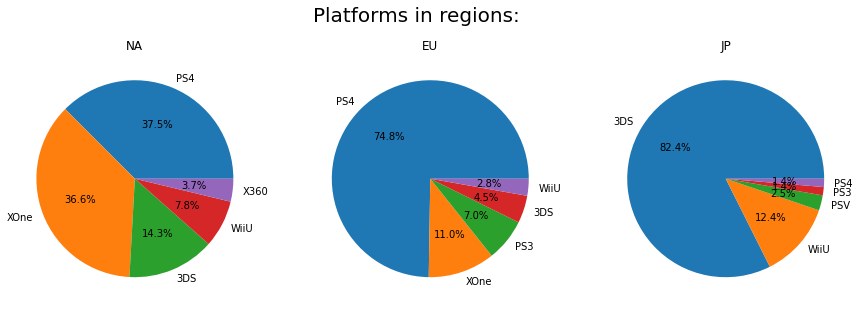

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Platforms in regions:', fontsize=20)
axs[0].pie(df_na_platforms.na_sales, labels=df_na_platforms.index, autopct='%1.1f%%')
axs[0].set_title("NA")

axs[1].pie(df_eu_platforms.eu_sales, labels=df_eu_platforms.index, autopct='%1.1f%%')
axs[1].set_title("EU")

axs[2].pie(df_jp_platforms.jp_sales, labels=df_jp_platforms.index, autopct='%1.1f%%')
axs[2].set_title("JP")
#ax.axis("equal")

plt.show()

##### Выводы по разделу:

За годы 2013-2016 видно, что 
в мире самая популярная (по выручке продаж игр) платформа - PlayStation 4 (314M), которая сменила PS3 (181M). Ближайший конкурент от Microsoft - XOne, который соотвествует поколению PS4 - отстаёт по продажам в 2 раза (159M).
Чуть меньше занимает 3DS (143M).

Вывод отсюда - необходимо разрабатывать игры для PS4, т.к. она на подъёме и будет расти ещё пару лет. На втором месте - XOne, но всё же он сильно отстаёт.

#### Самые популярны жанры и влияние на них рейтинга. 
* Самые популярные жанры (топ-5). Поясните разницу.


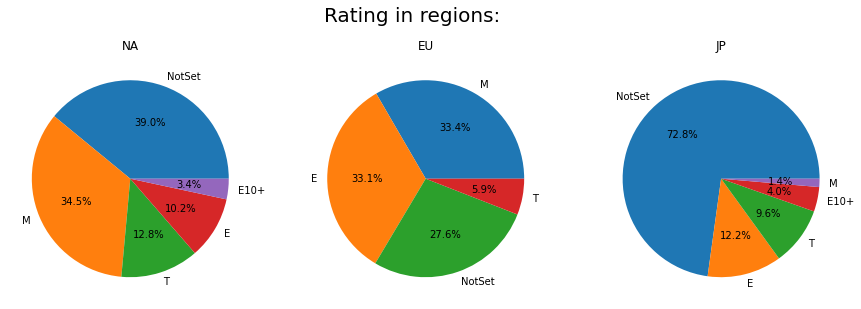

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Rating in regions:', fontsize=20)
axs[0].pie(df_na_ratings.na_sales, labels=df_na_ratings.index, autopct='%1.1f%%')
axs[0].set_title("NA")

axs[1].pie(df_eu_ratings.eu_sales, labels=df_eu_ratings.index, autopct='%1.1f%%')
axs[1].set_title("EU")

axs[2].pie(df_jp_ratings.jp_sales, labels=df_jp_ratings.index, autopct='%1.1f%%')
axs[2].set_title("JP")
#ax.axis("equal")

plt.show()

##### Выводы по разделу:


Рейтинг отсутствует в значительной части игр. 
Тем не менее, оставшиеся части позволяют сделать выводы, достаточные для принятия решения по выбору, какие игры разрабатывать и как их продвигать.

В Северной Америке и Европе крайне популярны игры с рейтингом М, на втором месте - Е.

Именно на них нужно будет сосредотачиваться при разработке. 
Также, рейтинг нужно будет получать обязательно - для крупных рынков Европы и Америки - это обязательно.

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?



Судя по выводам, которые я написал [выше](#imp), рейтинг действительно имеет значение - в NA и EU больше покупают игры с рейтингом M, тогда как в Японии - с рейтингом E.

<a id="step_5"></a>
## 5 = Проверка гипотез.
[к оглавлению](#back)

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

##### Проверяем гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."

Сформулируем нулевую и альтернативную гипотезы для первого случая - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;":

H0 фактически так и запишется: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Тогда альтернативная гипотеза H1 будет: "Средние пользовательские рейтинги платформ Xbox One и PC НЕодинаковые".

Т.к. мы реально не знаем, куда может быть смещена средняя выручка одного датасета относительно другого, то будем проверять двустороннюю гипотезу. Критический уровень статистической значимости возьмём за `5%`. Т.к.  мы будем исследовать гипотезу о равенстве двух независимых генеральных совокупностей, то функцию для проверки будем использовать `ttest_ind`.

Посчитаем, какое значение параметра `equal_var` использовать, т.к. по ряду параметров из этих выборок дисперсии действительно были разные.


In [119]:
dz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                1689 non-null   object        
 1   platform            1689 non-null   object        
 2   year_of_release     1689 non-null   datetime64[ns]
 3   genre               1689 non-null   object        
 4   na_sales            1689 non-null   float64       
 5   eu_sales            1689 non-null   float64       
 6   jp_sales            1689 non-null   float64       
 7   other_sales         1689 non-null   float64       
 8   critic_score        718 non-null    float64       
 9   user_score          981 non-null    object        
 10  rating              1689 non-null   object        
 11  world_sales         1689 non-null   float64       
 12  user_score_numeric  888 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(5)
me

In [120]:
df_xone = dz.query('platform == "XOne" and user_score_numeric > 0')
df_pc = dz.query('platform == "PC" and user_score_numeric > 0')


In [121]:
print('Дисперсия пользовательского рейтинга на Xone:', df_xone['user_score_numeric'].var())
print('Дисперсия пользовательского рейтинга на PC:', df_pc['user_score_numeric'].var())

Дисперсия пользовательского рейтинга на Xone: 1.8910066518847013
Дисперсия пользовательского рейтинга на PC: 2.901154315133451


Поскольку дисперси близки, то примем `equal_var` за `True`.

Проверяем гипотезу:

In [122]:
results = st.ttest_ind(df_xone['user_score_numeric'], df_pc['user_score_numeric'], equal_var = True)

alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Посмотрим на этих выборках, как распределены оценки пользователей:

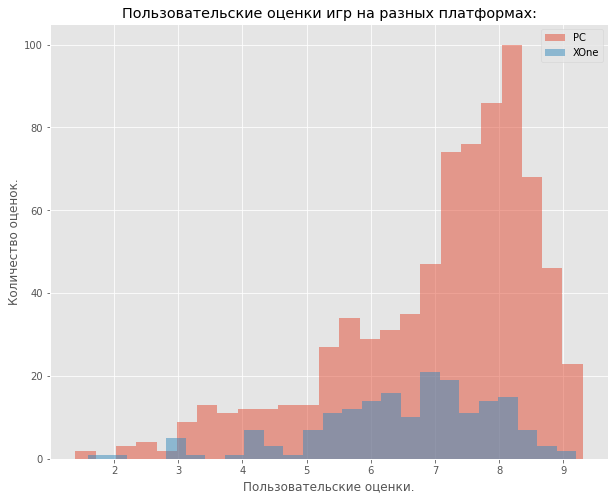

In [123]:
plt.style.use('ggplot') 

df.query('platform == "PC" or platform == "XOne"').groupby('platform')['user_score_numeric'].plot.hist(
    alpha=0.5, 
    legend=True, 
    bins=25, 
    figsize=(10,8))

plt.title('Пользовательские оценки игр на разных платформах:')
plt.xlabel('Пользовательские оценки.')
plt.ylabel('Количество оценок.')

plt.legend()
plt.show()

Это ненормализованный график, поэтому смотреть нужно не на абсолютные цифры, а на положене среднего. Видно, что на PC среднее лежит выше, чем для XOne. Но проверим - посчитаем:

In [124]:
print('средние оценки игр для XOne =', df_xone['user_score_numeric'].mean())
print('средние оценки игр для PC = ', df_pc['user_score_numeric'].mean())

средние оценки игр для XOne = 6.594545454545456
средние оценки игр для PC =  6.298360655737705


Предположение, сделанное по графку - ошибочное! На самом деле средние оценки у XOne - выше!

Проверим также медианные значения:

In [125]:
print('медианные оценки игр для XOne =', df_xone['user_score_numeric'].median())
print('медианные оценки игр для PC = ', df_pc['user_score_numeric'].median())

медианные оценки игр для XOne = 6.8
медианные оценки игр для PC =  6.8


##### Проверяем гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные."

Сформулируем нулевую и альтернативную гипотезы для первого случая - "Средние пользовательские рейтинги жанров Action и Sports разные.":

H0: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Тогда альтернативная гипотеза H1 будет: "Средние пользовательские рейтинги жанров Action и Sports разные".

Т.к. мы реально не знаем, куда может быть смещено среднее одного рейтинга относительно другого, то будем проверять двустороннюю гипотезу. Критический уровень статистической значимости возьмём за `5%`. Т.к.  мы будем исследовать гипотезу о равенстве двух независимых генеральных совокупностей, то функцию для проверки будем использовать `ttest_ind`.

Посчитаем, какое значение параметра `equal_var` использовать, т.к. по ряду параметров из этих выборок дисперсии действительно были разные.


In [126]:
df_actions = dz.query('genre == "Action" and user_score_numeric > 0')
df_sports  = dz.query('genre == "Sports" and user_score_numeric > 0')

In [127]:
print('Дисперсия пользовательского рейтинга по жанру Action:', df_actions['user_score_numeric'].var())
print('Дисперсия пользовательского рейтинга по жанру Sports:', df_sports['user_score_numeric'].var())

Дисперсия пользовательского рейтинга по жанру Action: 1.8984766584766581
Дисперсия пользовательского рейтинга по жанру Sports: 3.446979127609048


Поскольку дисперси отличаются в два раза, то примем `equal_var` за `False`.

Проверяем гипотезу:

In [128]:
results = st.ttest_ind(df_actions['user_score_numeric'], df_sports['user_score_numeric'], equal_var = False)

alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


Посмотрим, как это выглядит на графике:

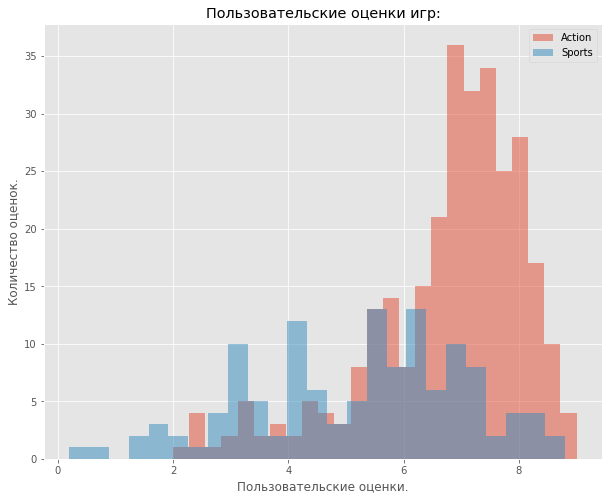

In [129]:
plt.style.use('ggplot') 

dz.query('genre == "Action" or genre == "Sports" and user_score_numeric > 0').groupby('genre')['user_score_numeric'].plot.hist(
    alpha=0.5, 
    legend=True, 
    bins=25, 
    figsize=(10,8))

plt.title('Пользовательские оценки игр:')
plt.xlabel('Пользовательские оценки.')
plt.ylabel('Количество оценок.')

plt.legend()
plt.show()

И действительно, визуально средние находятся далеко, причём экшн в среднем оценивается выше, чем спорт в 2014-2014 годах.

Проверим это на рассчётах:

In [130]:
print('средние оценки игр жанра Action =', df_actions['user_score_numeric'].mean())
print('средние оценки игр жанра Sports = ', df_sports['user_score_numeric'].mean())

средние оценки игр жанра Action = 6.760606060606061
средние оценки игр жанра Sports =  5.2251968503937


In [131]:
print('медианные оценки игр для Action =', df_actions['user_score_numeric'].median())
print('медианные оценки игр для Sports = ', df_sports['user_score_numeric'].median())

медианные оценки игр для Action = 7.1
медианные оценки игр для Sports =  5.5


###### Выводы по разделу:

Результаты проверки гипотез: 
* `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые` - опровергнута. Средний пользовательский рейтинг игр для PC - ниже, чем для Xbox one.

* `Средние пользовательские рейтинги жанров Action и Sports одинаковые` - не может быть опровергнута.

<a id="step_6"></a>
## 6 = Общий вывод
[к оглавлению](#back)



### 1. Импорт данных
проблем не возникло. 



### 2. предобработка данных:

*Имена полей:*
* Все имена полей имели "кривой CamelType формат". Привёл их к формату snake_type.

*Изменене типа данных:*
* поменял тип данных на datetime в случае года выпуска игры. Это позволит удобнее работать далее с этим полем.
* хотел также изменить рейтинги пользовательские и критиков на int, но это не получилось сделать, т.к. в случае с рейтингом пользовательском произошло бы очень грубое округление, а в случае с `critic_score` - есть строковая переменная `tbd`, которую на корректное значение не изменить. Поэтому оба поля не трогал

*Пропуски:*
* Ряд полей имели пропуски. Строки с некоторыми из них можно было безболезненно удалить (где было 2 пропуска в поле `name`).
* поля `year_of_release`, `critic_score`, `user_score`, `rating` имеют большое количество пропусков. И если поле `year_of_release` можно было бы отбросить (т.к. количество пропусков всего 1.6%), то остальные из указанных полей имеют количество пропусков 40..50%, которые нельзя просто отбросить - их слишком много. При этом их нельзя и заполнить - это субъективные оценки, поэтому медианой их не заполнить. Поэтому оставил их как есть.

*Обработка аномалий:*

* аномалий не обнаружил.
* дубликатов нет.

### Выводы по разделу "Анализ данных"

* популярность **любой** платформы не вечна - она длится 4-5 лет, потом сходит на нет. Поэтому смотреть на самые большие по объёму платформы не стоит - их пик уже скорее всего пройден. Нужно смотреть на платформы, которые начали расти несколько лет назад. Поэтому возьмём данные по платформам за последние 5 лет.
* на конец 2015 года растут только две платформы  - это PS4 и XOne. Это значит, что они будут приносить прибыль ещё несколько лет. И дальше также пойдут на спад. А в создание игр на остальных платформах не стоит фокусироваться. 
* популярность платформ очень сильно отличается, во-первых, по количеству выпущенных игр. На некоторых, судя по всему выпустили всего по несколько игр (GG, 3DO, PCFX). На других - на порядки больше (DS, PS2).
Второй параметр - медианное значение выручки с проданных игр также очень сильно отличается. У подавляющего большинства платформ - медианная выручка составляет порядка сотен тысяч долларов, у единиц - более миллиона долларов за игру (GB, NES).
обратим внимание, что обе эти платформы - достаточно старые. Почему-то им удалось сделать хиты, каждый из которых смог собрать большую кассу. Из боксплотов этого не видно, но нужно взять на заметку.
* видно, что несмотря на то, что на графиках проглядывается прямая зависимость выручки от отзывов как критиков, так и пользователей, на продажи отзывы влияют слабо. Для большей части игр корреляция вообще околонулевая. Для некоторых платформ (PS3) такая корреляция достигает 0.43, что всё равно говорит о слабой корреляции.
* Если стоит задача - какую игру создавать, то можно дать следующие рекомендации:
 * не делать игры непопулярных жанров: Puzzle, Strategy и Adventure;
 * варианты с низким и средим риском и средними оборотами по продажам (высоким спросом) - Sports, Action
 * Варанты с высоким риском и потенциально высокой отдачей - Platform, Shooter.

### Выводы по разделу "Портрет пользователя каждого региона."

Рынки сильно различаются по ёмкости:

|Регион|Объём продаж в млн долл|
|--|--|
|NA|284|
|EU|270|
|JP|93|

* Шутеры являются одним из лидирующих жанров в США (46%) и Европе (34%), при этом почти не популярны в Японии.
* Экшн - на них приходится 15-16% продаж в США / Европе и 25 - в Японии.
* Спортивные - любят только в Европе (33%)
* Ролевые - в Японии (46%) и немного в США (16%)

Самый важный вывод отсюда - "денежные" жанры для разработки - это Шутеры и Экшн. Остальные - сильно нишевые.

в мире самая популярная (по выручке продаж игр) платформа - PlayStation 4 (314M), которая сменила PS3 (181M). Ближайший конкурент от Microsoft - XOne, который соотвествует поколению PS4 - отстаёт по продажам в 2 раза (159M).
Чуть меньше занимает 3DS (143M).

Вывод отсюда - необходимо разрабатывать игры для PS4, т.к. она на подъёме и будет расти ещё пару лет. На втором месте - XOne, но всё же он сильно отстаёт.

Таким образом, если выбирать наиболее ёмкие рынки, то необходимо смотреть прежде всего на рынки северной Америки и Европы, которые неосколько похожи. Здесь необходимо предлагать жёсктие стрелялки (Shooter / Action + рейтинг M).

Рейтинг отсутствует в значительной части игр. 
Тем не менее, оставшиеся части позволяют сделать выводы, достаточные для принятия решения по выбору, какие игры разрабатывать и как их продвигать.

В Северной Америке и Европе крайне популярны игры с рейтингом М, на втором месте - Е.

Именно на них нужно будет сосредотачиваться при разработке. 
Также, рейтинг нужно будет получать обязательно - для крупных рынков Европы и Америки - это обязательно.

### Выводы по разделу "проверка гипотез."

* `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые` - опровергнута. Средний пользовательский рейтинг игр для PC - ниже, чем для Xbox one.

* `Средние пользовательские рейтинги жанров Action и Sports одинаковые` - не может быть опровергнута.

### Ответы на основные вопросы работы.

Основной вопрос работы: `"выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании."`

По объёму рынка - стоит целиться в рынки северной Америки и Европы. Они вместе занимают более 85% рынка.

Предпочтительные жанры для разработки - Shooters и Actions.

Рейтинг обязательно нужно будет присваивать, т.к. он очень важен для этих рынков. Из рейтингов, несмотря на ограничения, очень популярен М, на втором месте - Е. 

Платформы для разработки стоит выбирать PS4 и XOne. Причём PS4 выглядит более перспективной. Они, вероятно, ещё будут приносить прибыль в 2017 и ещё пару лет. И дальше также пойдут на спад. Но пока не видно других платформ, которые могли бы быть не менее интересными. 

При этом не стоит ориентироваться на отзывы критиков и, как ни странно, пользователей - корреляция между ними и продажами незначительная. 